### Question 6 -
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all Pokemons whose spawn rate is less than 5%
● Get all Pokemons that have less than 4 weaknesses
● Get all Pokemons that have no multipliers at all
● Get all Pokemons that do not have more than 2 evolutions
● Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
● Get all Pokemon who have more than two types of capabilities


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('pokedex.csv')

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df['Spawn Chance'] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5)

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df['Weakness'].str.count(',') < 3]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses)

# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df['Next Evolution'].str.count(',') < 2]
print("Pokemons with less than 2 evolutions:")
print(less_than_2_evolutions)

# Convert spawn time to seconds
df['Spawn Time'] = pd.to_datetime(df['Spawn Time'], format='%M:%S')
df['Spawn Time (seconds)'] = df['Spawn Time'].dt.minute * 60 + df['Spawn Time'].dt.second

# Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_less_than_300 = df[df['Spawn Time (seconds)'] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300)

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df['Type'].str.count(',') > 1]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types)

Pokemons with spawn rate less than 5%:
      ID  Number        Name  \
0      1       1   Bulbasaur   
1      2       2     Ivysaur   
2      3       3    Venusaur   
3      4       4  Charmander   
4      5       5  Charmeleon   
..   ...     ...         ...   
146  147     147     Dratini   
147  148     148   Dragonair   
148  149     149   Dragonite   
149  150     150      Mewtwo   
150  151     151         Mew   

                                                Image                  Type  \
0    http://www.serebii.net/pokemongo/pokemon/001.png   ['Grass', 'Poison']   
1    http://www.serebii.net/pokemongo/pokemon/002.png   ['Grass', 'Poison']   
2    http://www.serebii.net/pokemongo/pokemon/003.png   ['Grass', 'Poison']   
3    http://www.serebii.net/pokemongo/pokemon/004.png              ['Fire']   
4    http://www.serebii.net/pokemongo/pokemon/005.png              ['Fire']   
..                                                ...                   ...   
146  http://www.serebii

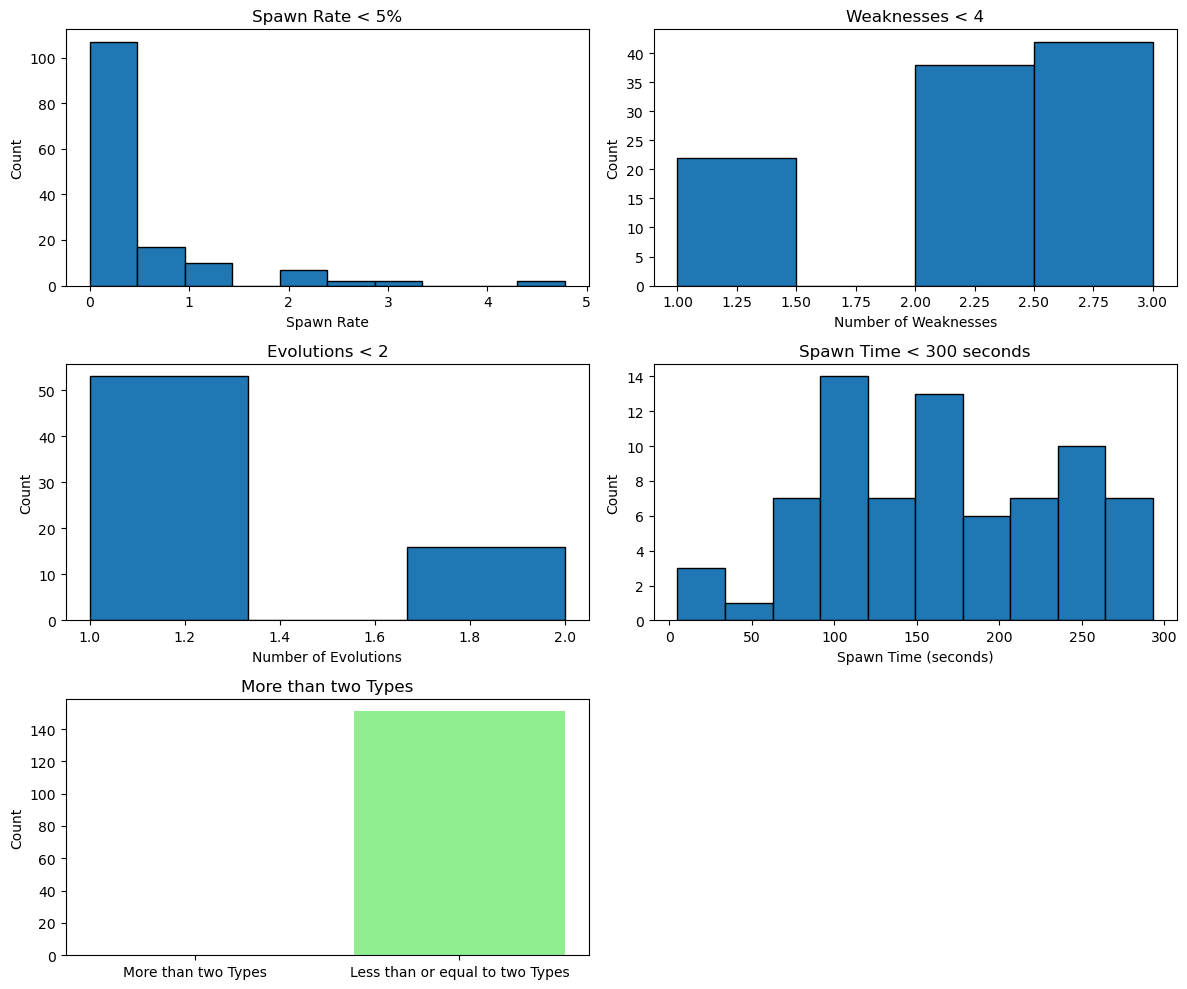

In [33]:
# Plot the analysis results
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.title('Spawn Rate < 5%')
plt.hist(spawn_rate_less_than_5['Spawn Chance'], bins=10, edgecolor='black')
plt.xlabel('Spawn Rate')
plt.ylabel('Count')

plt.subplot(3, 2, 2)
plt.title('Weaknesses < 4')
plt.hist(less_than_4_weaknesses['Weakness'].str.count(',') + 1, bins=4, edgecolor='black')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')

plt.subplot(3, 2, 3)
plt.title('Evolutions < 2')
plt.hist(less_than_2_evolutions['Next Evolution'].str.count(',') + 1, bins=3, edgecolor='black')
plt.xlabel('Number of Evolutions')
plt.ylabel('Count')

plt.subplot(3, 2, 4)
plt.title('Spawn Time < 300 seconds')
plt.hist(spawn_time_less_than_300['Spawn Time (seconds)'], bins=10, edgecolor='black')
plt.xlabel('Spawn Time (seconds)')
plt.ylabel('Count')

plt.subplot(3, 2, 5)
plt.title('More than two Types')
plt.bar(['More than two Types', 'Less than or equal to two Types'], [len(more_than_2_types), len(df) - len(more_than_2_types)], color=['skyblue', 'lightgreen'])
plt.ylabel('Count')

plt.tight_layout()
plt.show()